<a href="https://colab.research.google.com/github/Communist02/BIN-22-1_Mazur_Denis_AI/blob/main/z2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Анализ целевой переменной Y с точки зрения статистики

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

In [ ]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропуски есть

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Price = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_median.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


Выбираем целевую переменную

В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

In [ ]:
df['is_big_price'] = np.where(df['Price'] >= 30000, 1, 0).astype(int)

In [ ]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'is_big_price'],
      dtype='object')

In [ ]:
Y = df['is_big_price'] # выбираем целевую переменную (категориальную)
X = df.drop('is_big_price', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Price', axis=1)

Графический анализ

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight
0,1.10
1,0.83
2,0.85
3,0.91
4,0.83
...,...
5995,1.03
5996,1.00
5997,1.02
5998,1.27


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


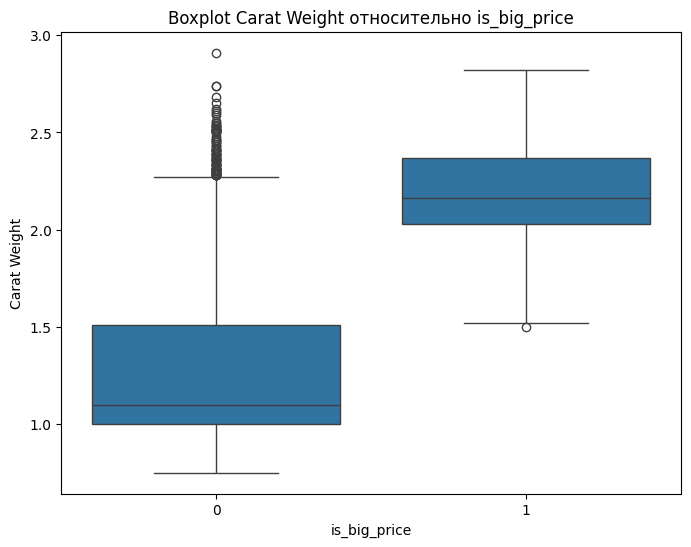

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_big_price', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_big_price')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

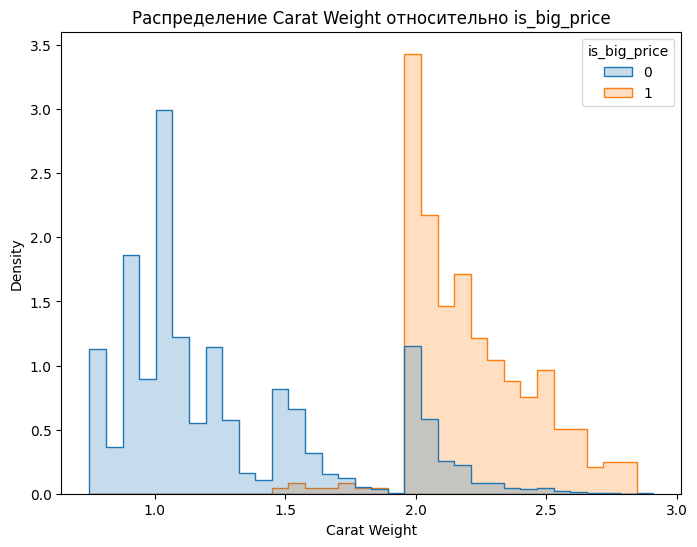

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_big_price', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_big_price')
    plt.show()

Цена в 30000 у.е. начинается примущественно с карата около 2.0, есть некоторый оверпрайс с 1.5 карата. Так как 30000 у.е. довольно резкий переход, то на планке в 2.0 карата также много экземляров чуть ниже по цене. Зависимость почти прямая

In [ ]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_big_price')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_numeric


Carat Weight                                                    \
                    count      mean       std   min   25%   50%   75%   max   
is_big_price                                                                  
0                  5624.0  1.275843  0.427731  0.75  1.00  1.10  1.51  2.91   
1                   376.0  2.212181  0.229524  1.50  2.03  2.16  2.37  2.82   

               Price                ...                     is_big_price       \
               count          mean  ...       75%       max        count mean   
is_big_price                        ...                                         
0             5624.0   9890.248044  ...  12414.75   29957.0       5624.0  0.0   
1              376.0  40230.640957  ...  44379.25  101561.0        376.0  1.0   

                                            
              std  min  25%  50%  75%  max  
is_big_price                                
0             0.0  0.0  0.0  0.0  0.0  0.0  
1             0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 24 columns]

In [ ]:
# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_big_price')[df.select_dtypes(include=['object']).columns].describe()
desc_stats_categorical

Cut                         Color                  Clarity  \
             count unique        top  freq count unique top  freq   count   
is_big_price                                                                
0             5624      5  Very Good  2291  5624      6   G  1416    5624   
1              376      4      Ideal   214   376      6   F   102     376   

                     ... Polish       Symmetry                  Report         \
             unique  ...    top  freq    count unique top  freq  count unique   
is_big_price         ...                                                        
0                 6  ...     VG  2270     5624      4  VG  2291   5624      2   
1                 7  ...     EX   191      376      4  EX   184    376      2   

                         
              top  freq  
is_big_price             
0             GIA  4919  
1             GIA   347  

[2 rows x 24 columns]

Описание полученных результатов

Подобное описание для своих переменных

Cut (Огранка):

    Обычные бриллианты (is_best_diamond = 0):
        Всего: 5747.
        4 уникальных категории.
        Самая частая категория: Ideal (Идеальная огранка) — 2482 бриллианта (частота 43%).

    Лучшие бриллианты (is_best_diamond = 1):
        Всего: 253.
        1 уникальная категория: Signature-Ideal (Фирменная идеальная огранка), что предполагает эксклюзивный стандарт огранки для лучших бриллиантов.

Color (Цвет):

    Обычные бриллианты:
        6 уникальных категорий цвета.
        Самый популярный цвет: G — 1437 бриллиантов.

    Лучшие бриллианты:
        6 уникальных категорий цвета (совпадает с обычными бриллиантами).
        Самый частый цвет также G, но с меньшей частотой — 64 бриллианта.

Clarity (Чистота):

    Обычные бриллианты:
        7 уникальных категорий.

    Лучшие бриллианты:
        Также 7 категорий, как и у обычных бриллиантов.

Polish (Полировка):

    Обычные бриллианты:
        Самая частая категория полировки: VG (Very Good) — 2409 бриллиантов.

    Лучшие бриллианты:
     Самая частая категория: ID (Ideal) — 171 бриллиант.
    Symmetry (Симметрия):

        Обычные бриллианты:
            Самая частая симметрия: VG (Very Good) — 2417 бриллиантов.

        Лучшие бриллианты:
            Самая частая симметрия: ID (Ideal) — 171 бриллиант.

    Report (Сертификат):

        Обычные бриллианты:
            Самый частый сертификат: GIA (Gemological Institute of America) — 5184 бриллианта.

        Лучшие бриллианты:
            Все бриллианты имеют сертификат AGSL (American Gem Society Laboratories) — 171 бриллиант.

Основные выводы: - Огранка у обычных бриллиантов варьируется, в то время как все лучшие бриллианты имеют эксклюзивную огранку Signature-Ideal. - Цвет и чистота у лучших и обычных бриллиантов разнообразны, но в обеих группах преобладает цвет G. - У лучших бриллиантов наблюдается более высокий стандарт для полировки и симметрии (категория Ideal), тогда как у обычных преобладает Very Good. - Все лучшие бриллианты сертифицированы AGSL, в то время как большинство обычных бриллиантов сертифицированы GIA.

In [ ]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_big_price')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Carat Weight:

               count      mean       std   min   25%   50%   75%   max
is_big_price                                                          
0             5624.0  1.275843  0.427731  0.75  1.00  1.10  1.51  2.91
1              376.0  2.212181  0.229524  1.50  2.03  2.16  2.37  2.82




Расчет теста Пирсона

Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

Рассчитайте коэффициенты корреляции Пирсона для каждого признака:

In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,is_big_price
Carat Weight,1.000000,0.858562,0.477095
Price,0.858562,1.000000,0.722087
is_big_price,0.477095,0.722087,1.000000


Коэффициент корреляции Пирсона показывает степень линейной связи между двумя переменными.

Carat Weight и Price (0.858562)
- Большая корреляция, следовательно, цена сильно зависит от карата

Price и is_big_price (0.722087)
- Как и ожидалось, очень высокая корреляция. Это обусловлено тем, что признак is_big_price напрямую основан на значении Price.

Carat Weight и is_big_price (0.477095)
- Корреляция средняя, связано с тем, что разные значения is_big_price пересекаются у значения карата 2.0

Немного машинного обучения

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [ ]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [ ]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight']


In [ ]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.037037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.046296,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.074074,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,0.115741,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,0.125000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Объяснение логистической регрессии



Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу. Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

Функция для обучения и оценки модели


In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9823
Точность на тестовой выборке: 0.9792

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1125
           1       0.95      0.71      0.81        75

    accuracy                           0.98      1200
   macro avg       0.96      0.85      0.90      1200
weighted avg       0.98      0.98      0.98      1200





Пояснение:

    Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
    Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
    Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
    F1-score: Гармоническое среднее между точностью и полнотой.



In [ ]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                Feature  Coefficient
0          Carat Weight    11.611847
9               Color_I    -4.445145
11          Clarity_SI1    -3.620727
8               Color_H    -3.566537
7               Color_G    -2.065492
10           Clarity_IF     1.664268
13          Clarity_VS2    -1.362991
14         Clarity_VVS1     0.780027
22           Report_GIA     0.740338
21          Symmetry_VG    -0.478673
3   Cut_Signature-Ideal     0.443337
6               Color_F    -0.419446
1              Cut_Good    -0.393870
19           Symmetry_G    -0.391440
2             Cut_Ideal     0.332768
17            Polish_ID     0.257371
16             Polish_G     0.243510
15         Clarity_VVS2     0.168474
20          Symmetry_ID     0.115980
12          Clarity_VS1    -0.097665
18            Polish_VG     0.086254
4         Cut_Very Good    -0.035992
5               Color_E     0.007020


# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

4. Построение модели логистической регрессии для предсказания качества вина


    - Модель логистической регрессии успешно обучена для предсказания лучших вин.
    - Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.
    - Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:
        - Содержание алкоголя и сульфатов положительно влияют на качество.
        - Плотность и летучая кислотность отрицательно влияют на качество.
    - Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.


Кросс-валидация модели

In [ ]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9810
Отклонение точности: 0.0021


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

Построение ROC-кривой

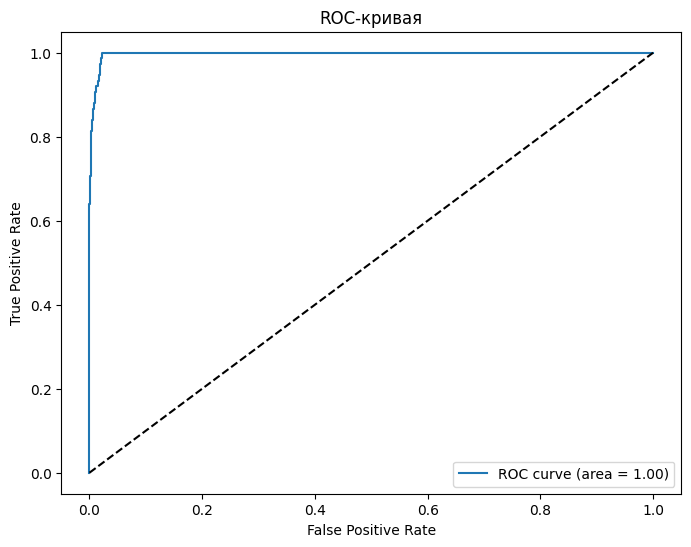

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()